<a href="https://colab.research.google.com/github/Banafshehkh/ComputerVision/blob/main/DL4Vision_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2
In this assignment, we will use a multi-layer perceptron network to build an image classifier for single digits. We will be using a public dataset for model development. The dataset we will be using is the MNIST digit dataset. The dataset contains 10 classes, where class `i` contains images of digit `i`.

Source: https://nextjournal.com/gkoehler/pytorch-mnist

https://www.projectpro.io/article/exploring-mnist-dataset-using-pytorch-to-train-an-mlp/408

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from torchvision import datasets, transforms
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F




import matplotlib.pyplot as plt

####1. Create train_data and test_dataset objects using the MNIST digit dataset from torchvision.datasets module. (5 points)

In [ ]:
train_data = torchvision.datasets.MNIST('data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))




test_data = torchvision.datasets.MNIST('data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
image, label = train_data[0]
print("image shape:", image.shape, "\n", "image label:", label)

image shape: torch.Size([1, 28, 28]) 
 image label: 5


In [ ]:
from matplotlib.pyplot import figure


def visulaize(image, label):
  
  figure(figsize=(15, 8), dpi=80)
  plt.figure()
  plt.imshow(image.numpy()[0], cmap = 'gray')
  plt.title(str(label))
  plt.xticks([])
  plt.yticks([])

<Figure size 1200x640 with 0 Axes>

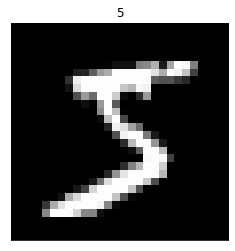

In [ ]:
visulaize(image, label) # first image with its label

####2. Use the [random_split](https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split) method to split the `train_data` into `train_dataset` (50000 images) and `validation_dataset` dataset (10000 images). (5 points)

In [ ]:
train_data, val_data = torch.utils.data.random_split(train_data, [50000, 10000], generator=torch.Generator().manual_seed(42))

In [ ]:
image, label = val_data[0]
print("image shape:", image.shape, "\n", "image label:", label)

image shape: torch.Size([1, 28, 28]) 
 image label: 4


#### 3. Create dataloader objects for `train_dataset`, `validation_dataset`, and `test_dataset`. (5 points)

In [ ]:
train_dataloader = DataLoader(train_data, 32, shuffle = True )
validation_dataloader = DataLoader(val_data, 32, shuffle = False )
test_dataloader = DataLoader(test_data, 32, shuffle = False )

#### 4. Develop an MLP model for classifying MNIST images. The developed model should have four hidden layers of 256, 1228, 64, and 32 neurons. Each hidden layer should be followed with a ReLU unit and a Dropout layer (p=0.2).  (15 points)

The pixels in the images will be flattened to form an array of 784-pixel values.

In [ ]:
class MLP(nn.Module):

  def __init__(self, input_size = 784, output_size = 10, layers = [256, 1228, 64, 32]):
    super(MLP, self).__init__()
    self.d1 = nn.Linear(input_size, layers[0]) #hidden_layer1
    self.d2 = nn.Linear(layers[0], layers[1]) #hidden_layer2
    self.d3 = nn.Linear(layers[1], layers[2]) #hiddenn_layer3
    self.d4 = nn.Linear(layers[2], layers[3]) #hiddenn_layer4
    self.d5 = nn.Linear(layers[3], output_size) #output layer
    self.dropout = nn.Dropout(p = 0.2)



  def forward(self, X):
    X = X.view(-1, 28*28)
    X = F.relu(self.d1(X))
    X = self.dropout(X)
    X = F.relu(self.d2(X))
    X = self.dropout(X)
    X = F.relu(self.d3(X))
    X = self.dropout(X)
    X = F.relu(self.d4(X))
    X = self.dropout(X)
    X = self.d5(X)
    return F.log_softmax(X, dim = 1)


explanation: the 'nn.module' class from pytorch is subclassed to define a custom MLP model for MNIST dataset. The output of the model is passed through a log-softmax function to obtain the predicted class probability.

In [ ]:
model = MLP()
print(model)

MLP(
  (d1): Linear(in_features=784, out_features=256, bias=True)
  (d2): Linear(in_features=256, out_features=1228, bias=True)
  (d3): Linear(in_features=1228, out_features=64, bias=True)
  (d4): Linear(in_features=64, out_features=32, bias=True)
  (d5): Linear(in_features=32, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


#### 5. Define the components needed for training a deep learning model. (10 points)



In general training a deep learning model typically involves the following components:
1. Data: A training dataset and a validation dataset that the model will learn from and test on, respectively. The data should be split into inputs (features) and targets (labels).

2. Model architecture: The structure of the model, including the number of layers, the number of neurons in each layer, the activation functions, and the type of layers (e.g. dense, convolutional, recurrent).

3. Loss function: A measure of the difference between the predicted labels and the true labels. The loss function guides the model's learning process by penalizing incorrect predictions. 

4. Optimizer: A mathematical algorithm that adjusts the model's parameters in order to minimize the loss function. Examples of optimizers include stochastic gradient descent (SGD), Adam, and Adagrad.

5. Hyperparameters: Parameters that are not learned by the model during training, but are set before training begins. Examples of hyperparameters include the learning rate, batch size, and number of training epochs.

6. Training loop: A loop that trains the model over multiple epochs by splitting the training data into batches, forwarding the input through the model to obtain predictions, computing the loss, updating the model's parameters with the optimizer, and repeating until all the training data has been seen.

7. Evaluation metric: A measure of how well the model is performing, such as accuracy, F1 score, or AUC. The evaluation metric is used to monitor the model's performance on the validation dataset.

8. Early stopping: A mechanism that stops the training loop early if the model's performance on the validation dataset does not improve for a certain number of epochs, in order to avoid overfitting.



#### 6. Write the training loop and train the model for 100 epochs. Print the training and validation accuracy and loss for each epoch. (35 points)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.9)

In [ ]:
for images, labels in train_dataloader:
  print('initial batch shape:', images.size())
  break
print("Batch shape after flattening", images.view(32, -1).size())

initial batch shape: torch.Size([32, 1, 28, 28])
Batch shape after flattening torch.Size([32, 784])


I trained the model for 100 epochs, with each consisting of a training and a validation phase. the training phase evaluates the model on the validation set and calculates the validation loss and accuracy. Finally, the code tests the model on the test set and prints the test accuracy. 

In [ ]:
# Initialize the model, loss function, and optimizer
model = MLP()
num_epochs =100



for epoch in range(100):
    running_loss = 0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_dataloader)
    # print('Epoch {}: train loss: {:.4f}'.format(epoch + 1, train_loss))

    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in train_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    train_acc = 100 * correct / total
    # print('Epoch {}: train accuracy: {:.2f}%'.format(epoch + 1, train_accuracy))

    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in validation_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_acc = 100 * correct / total
    val_loss = loss.item() / len(validation_dataloader)
    # print('Epoch {}: validation accuracy: {:.2f}%, validation loss: {:.4f}'.format(epoch + 1, accuracy, validation_loss))
    print('Epoch [{}/{}], Loss: {:.4f}, Acc:{:.4f}, Val Loss: {:.4f}, Val Acc: {:.4f}'.format(epoch + 1, num_epochs, train_loss, train_acc, val_loss, val_acc))

print('Finished training.')





Epoch [1/100], Loss: 2.3069, Acc:11.0100, Val Loss: 0.0073, Val Acc: 11.3700
Epoch [2/100], Loss: 2.3069, Acc:11.0400, Val Loss: 0.0073, Val Acc: 10.6800
Epoch [3/100], Loss: 2.3068, Acc:10.9740, Val Loss: 0.0073, Val Acc: 11.3000
Epoch [4/100], Loss: 2.3068, Acc:11.0040, Val Loss: 0.0073, Val Acc: 10.9300
Epoch [5/100], Loss: 2.3070, Acc:11.0620, Val Loss: 0.0073, Val Acc: 11.0600
Epoch [6/100], Loss: 2.3069, Acc:10.9200, Val Loss: 0.0073, Val Acc: 10.6200
Epoch [7/100], Loss: 2.3069, Acc:10.8360, Val Loss: 0.0073, Val Acc: 11.4200
Epoch [8/100], Loss: 2.3070, Acc:10.9120, Val Loss: 0.0073, Val Acc: 11.4400
Epoch [9/100], Loss: 2.3072, Acc:11.0780, Val Loss: 0.0073, Val Acc: 11.2100
Epoch [10/100], Loss: 2.3068, Acc:10.8180, Val Loss: 0.0073, Val Acc: 10.8900
Epoch [11/100], Loss: 2.3071, Acc:10.9400, Val Loss: 0.0073, Val Acc: 11.2000
Epoch [12/100], Loss: 2.3071, Acc:11.1220, Val Loss: 0.0073, Val Acc: 10.7300
Epoch [13/100], Loss: 2.3070, Acc:11.0640, Val Loss: 0.0073, Val Acc: 11.

**zero_grad()** the training phase of every mini-batch we want to set them explicitly to zero before starting the backpropagation at that time we can use zero_grad() function as per requirement.



**loss.backward** 
The backward() method in Pytorch is used to calculate the gradient during the backward pass in the neural network. If we do not call this backward() method then gradients are not calculated for the tensors. 

**optimizer.step()** Performs a single optimization step (parameter update)

when initializing optimizer you explicitly tell it what parameters (tensors) of the model it should be updating. The gradients are "stored" by the tensors themselves (they have a grad and a requires_grad attributes) once you call backward() on the loss. After computing the gradients for all tensors in the model, calling optimizer.step() makes the optimizer iterate over all parameters (tensors) it is supposed to update and use their internally stored grad to update their values.

**loss.ietm()** calculates the running loss so that you could later calculate the mean loss of that epoch.

the code iterates over the batches in the train_loader, and for each batch, the model is applied to the inputs with outputs = model(inputs). The prediction is made by taking the index of the maximum value in the output with _, predicted = torch.max(outputs.data, 1). The total number of samples is accumulated in total, and the number of correct predictions is accumulated in correct.

####6. Test the model using the `test_dataset`, and report accuracy and loss. (10 points)

In [ ]:
# Test the model on the test dataset


correct = 0
total = 0
test_loss = 0
with torch.no_grad():
    for data in test_dataloader:
        inputs, labels = data
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
test_loss /= len(test_dataloader)
print('Test accuracy: {:.2f}%, Test loss: {:.4f}'.format(test_accuracy, test_loss))


Test accuracy: 11.04%, Test loss: 2.3062


#### 8. We would like to see how accurate the trained model is when applied to a set of images of digits with slight differences. The image of a digit in the MNIST dataset has a black background (0 value for pixel values). This might be like writing with white chalk on a blackboard. We make slight changes in the test datasets by applying a simple change `image = 1 - image`. In other words, we invert the pixel intensity values. The resulting images resemble a digit written with a black marker on a whiteboard. Test the model using the updated test_dataset, and report your observations regarding model performance. How would you change your pipeline if you redo this experiment? (15 points)

In [ ]:
test_dataset = torchvision.datasets.MNIST('data', train=False, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: 1 - x)
]))

test_loader = DataLoader(test_dataset, 32, shuffle = False )
# Test the model on the test dataset


correct = 0
total = 0
test_loss = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
test_loss /= len(test_loader)
print('Test accuracy: {:.2f}%, Test loss: {:.4f}'.format(test_accuracy, test_loss))

Test accuracy: 10.22%, Test loss: 2.3052


The accuracy of the model decreased due to the change in the input images. This is because the model was trained on images with black background (0 value for pixel values) and might not perform well on images with white background.

To improve the model's performance:

- Data augmentation: we can augment the training dataset with variations of the images such as rotation, scaling, and flipping. This will increase the diversity of the training data and make the model more robust to changes in the input images.

- Preprocessing: we can perform additional preprocessing on the images such as thresholding, normalization, and contrast adjustment to make the images more similar to the training data.

- Model architecture: we can change the model architecture to make it more suitable for the task at hand. For example,by increasing the number of layers, neurons, or add more advanced techniques such as Convolutional Neural Networks (CNNs) or Recurrent Neural Networks (RNNs).

- Hyperparameter tuning: You can tune the hyperparameters such as learning rate, batch size, and number of epochs to optimize the model's performance.

- Training on larger dataset: You can train the model on a larger dataset to improve its generalization ability.